In [ ]:
!pip install tensorflow flask numpy matplotlib seaborn

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.1
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Class labels for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Print dataset shapes
print(f"Training data shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3), Labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


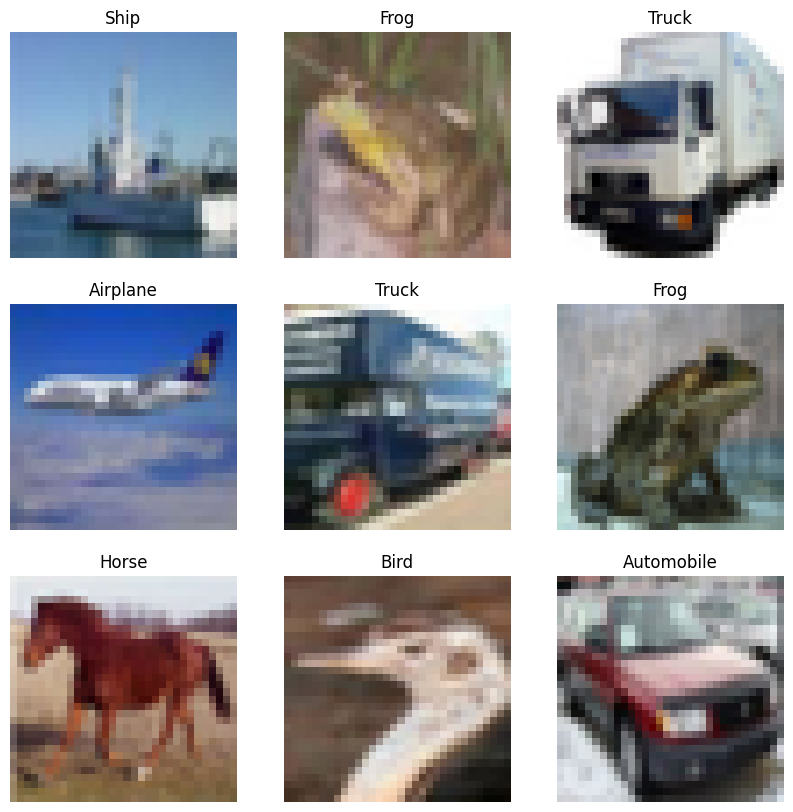

In [7]:
# Plot 9 random images from the dataset
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    idx = np.random.randint(len(x_train))  # Random index
    plt.imshow(x_train[idx])
    plt.title(class_names[y_train[idx][0]])
    plt.axis("off")
plt.show()

In [8]:
# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Data normalized successfully!")


Data normalized successfully!


In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # First conv layer
    layers.MaxPooling2D((2, 2)),  # First pooling layer
    layers.Conv2D(64, (3, 3), activation='relu'),  # Second conv layer
    layers.MaxPooling2D((2, 2)),  # Second pooling layer
    layers.Conv2D(128, (3, 3), activation='relu'),  # Third conv layer
    layers.Flatten(),  # Flattening layer
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3603 - loss: 1.7187 - val_accuracy: 0.5738 - val_loss: 1.2092
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6059 - loss: 1.1215 - val_accuracy: 0.6437 - val_loss: 1.0071
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6780 - loss: 0.9269 - val_accuracy: 0.6739 - val_loss: 0.9439
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7240 - loss: 0.7943 - val_accuracy: 0.7055 - val_loss: 0.8490
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7596 - loss: 0.6926 - val_accuracy: 0.7009 - val_loss: 0.8719
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7882 - loss: 0.6076 - val_accuracy: 0.7164 - val_loss: 0.8533
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8118 - loss: 0.5319 - val_accuracy: 0.7082 - val_loss: 0.8972
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8346 - loss: 0.4737 

In [12]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 0s - 2ms/step - accuracy: 0.6868 - loss: 1.1027

Test accuracy: 0.6868


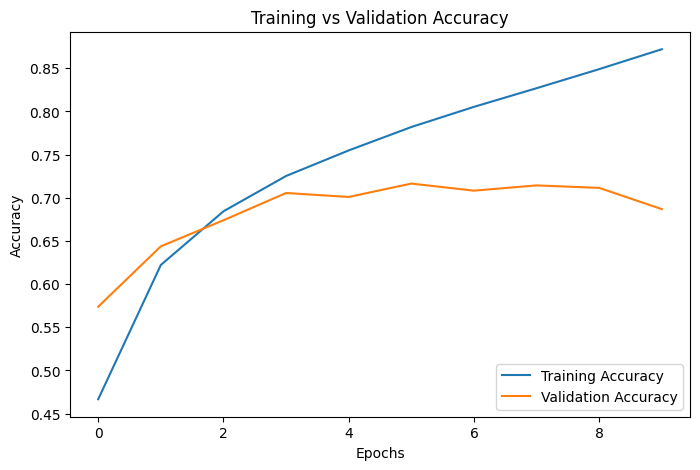

In [13]:
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(len(acc))

# Plot accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')
plt.show()

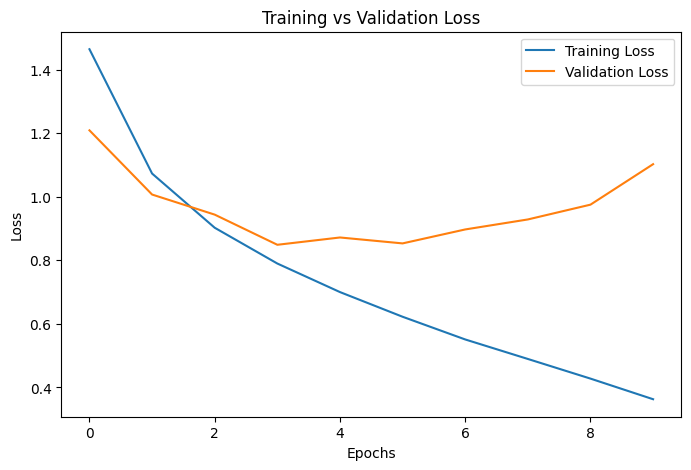

In [14]:
# Extract loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')
plt.show()

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Load pre-trained ResNet50 without top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model layers (to retain pre-trained features)
base_model.trainable = False

# Build new model with custom classification head
model_tl = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),  # New dense layer
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

# Compile the model
model_tl.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Print model summary
model_tl.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 1, 1, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,114,826 (91.99 MB)

 Trainable params: 527,114 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
# Train the model
history_tl = model_tl.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.1073 - loss: 2.3666 - val_accuracy: 0.1653 - val_loss: 2.2473
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.1304 - loss: 2.2601 - val_accuracy: 0.1919 - val_loss: 2.1928
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1498 - loss: 2.2340 - val_accuracy: 0.2058 - val_loss: 2.1792
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1579 - loss: 2.2190 - val_accuracy: 0.2323 - val_loss: 2.1394
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1604 - loss: 2.2000 - val_accuracy: 0.2518 - val_loss: 2.1000
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.1686 - loss: 2.1892 - val_accuracy: 0.2580 - val_loss: 2.0928
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1725 - loss: 2.1794 - val_accuracy: 0.2530 - val_loss: 2.0809
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.1759 - loss: 

In [18]:
# Unfreeze some layers for fine-tuning
base_model.trainable = True

# Recompile the model with a lower learning rate
model_tl.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Continue training (fine-tuning)
history_tl_finetune = model_tl.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 47ms/step - accuracy: 0.3492 - loss: 2.0960 - val_accuracy: 0.6898 - val_loss: 0.9535
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 92s 31ms/step - accuracy: 0.6809 - loss: 0.9582 - val_accuracy: 0.7422 - val_loss: 0.8135
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.7386 - loss: 0.7888 - val_accuracy: 0.7667 - val_loss: 0.6890
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7771 - loss: 0.6644 - val_accuracy: 0.7977 - val_loss: 0.6205
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.8391 - loss: 0.4899 - val_accuracy: 0.7774 - val_loss: 0.6944


In [19]:
# Evaluate transfer learning model
test_loss_tl, test_acc_tl = model_tl.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy after Transfer Learning: {test_acc_tl:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.7774 - loss: 0.6944

Test accuracy after Transfer Learning: 0.7774


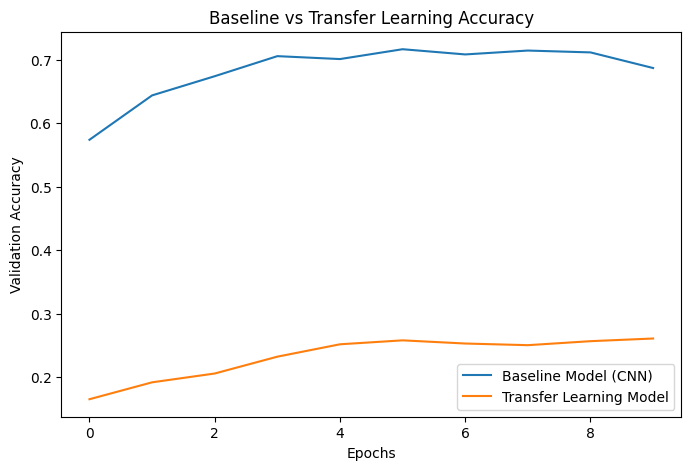

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_accuracy'], label='Baseline Model (CNN)')
plt.plot(history_tl.history['val_accuracy'], label='Transfer Learning Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Baseline vs Transfer Learning Accuracy')
plt.show()

In [21]:
model_tl.save("cifar10_model.h5")